In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from thefuzz import process
from thefuzz import process, fuzz


#PASO 1: cargar dataset
ruta_archivo = 'C:/Users/maron.LAPTOP-UEJMOSD4/Desktop/PI_2/Internet.xlsx'

# Paso 2: Cargar el archivo y obtener los nombres de las hojas
xls = pd.ExcelFile(ruta_archivo)
nombres_hojas = xls.sheet_names
print("Hojas de cálculo en el archivo:", nombres_hojas)

# Paso 3: Crear un DataFrame por cada hoja y guardarlo en la carpeta DATA_LIMPIO
for hoja in nombres_hojas:
    df = pd.read_excel(ruta_archivo, sheet_name=hoja)
    nombre_archivo = f"C:/Users/maron.LAPTOP-UEJMOSD4/Desktop/PI_2/DATA_LIMPIO{hoja}.csv"
    df.to_csv(nombre_archivo, index=False)
    print(f"Archivo guardado: {nombre_archivo}")

Hojas de cálculo en el archivo: ['Acc_vel_loc_sinrangos', 'Velocidad_sin_Rangos', 'Accesos_tecnologia_localidad', 'Velocidad % por prov', 'Totales VMD', 'Totales Accesos Por Tecnología', 'Accesos Por Tecnología', 'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Totales Accesos por rango', 'Accesos por rangos', 'Dial-BAf', 'Totales Dial-BAf', 'Ingresos ']
Archivo guardado: C:/Users/maron.LAPTOP-UEJMOSD4/Desktop/PI_2/DATA_LIMPIOAcc_vel_loc_sinrangos.csv
Archivo guardado: C:/Users/maron.LAPTOP-UEJMOSD4/Desktop/PI_2/DATA_LIMPIOVelocidad_sin_Rangos.csv
Archivo guardado: C:/Users/maron.LAPTOP-UEJMOSD4/Desktop/PI_2/DATA_LIMPIOAccesos_tecnologia_localidad.csv
Archivo guardado: C:/Users/maron.LAPTOP-UEJMOSD4/Desktop/PI_2/DATA_LIMPIOVelocidad % por prov.csv
Archivo guardado: C:/Users/maron.LAPTOP-UEJMOSD4/Desktop/PI_2/DATA_LIMPIOTotales VMD.csv
Archivo guardado: C:/Users/maron.LAPTOP-UEJMOSD4/Desktop/PI_2/DATA_LIMPIOTotales Accesos Por Tecnología.csv
Archivo guardado: C:/U

In [8]:
import pandas as pd

# Reemplaza 'nombre_archivo.csv' con el nombre de tu archivo CSV
archivo_csv = 'C:/Users/maron.LAPTOP-UEJMOSD4/Desktop/PI_2/DATA_LIMPIO/Acc_vel_loc_sinrangos.csv'

# Carga el archivo CSV en un DataFrame
df_Acc_vel_loc_sinrangos = pd.read_csv(archivo_csv)

# Muestra las primeras 5 filas del DataFrame
print(f"Mostrando las primeras 5 filas de {archivo_csv}:")
print(df_Acc_vel_loc_sinrangos.head())

Mostrando las primeras 5 filas de C:/Users/maron.LAPTOP-UEJMOSD4/Desktop/PI_2/DATA_LIMPIO/Acc_vel_loc_sinrangos.csv:
      Provincia     Partido   Localidad link Indec  Velocidad (Mbps)  Accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo    6854100              0.00      1.0
1  BUENOS AIRES  25 de Mayo  25 de Mayo    6854100              0.50      2.0
2  BUENOS AIRES  25 de Mayo  25 de Mayo    6854100              0.75     19.0
3  BUENOS AIRES  25 de Mayo  25 de Mayo    6854100              3.00     85.0
4  BUENOS AIRES  25 de Mayo  25 de Mayo    6854100              3.50    145.0


In [10]:
import pandas as pd

# Cargar el archivo CSV original
df_Acc_vel_loc_sinrangos = pd.read_csv("C:/Users/maron.LAPTOP-UEJMOSD4/Desktop/PI_2/DATA_LIMPIO/Acc_vel_loc_sinrangos.csv")

# Agregar la columna 'país' con el valor 'Argentina'
df_Acc_vel_loc_sinrangos['país'] = 'Argentina'

# Reordenar las columnas para que 'país' esté al principio
columns = ['país'] + [col for col in df_Acc_vel_loc_sinrangos.columns if col != 'país']
df_Acc_vel_loc_sinrangos = df_Acc_vel_loc_sinrangos[columns]

# Verificar los primeros registros para asegurarte de que la columna 'país' fue agregada correctamente
print(df_Acc_vel_loc_sinrangos.head())

        país     Provincia     Partido   Localidad link Indec  \
0  Argentina  BUENOS AIRES  25 de Mayo  25 de Mayo    6854100   
1  Argentina  BUENOS AIRES  25 de Mayo  25 de Mayo    6854100   
2  Argentina  BUENOS AIRES  25 de Mayo  25 de Mayo    6854100   
3  Argentina  BUENOS AIRES  25 de Mayo  25 de Mayo    6854100   
4  Argentina  BUENOS AIRES  25 de Mayo  25 de Mayo    6854100   

   Velocidad (Mbps)  Accesos  
0              0.00      1.0  
1              0.50      2.0  
2              0.75     19.0  
3              3.00     85.0  
4              3.50    145.0  


In [11]:
print("Valores únicos en 'Provincia':")
print(df_Acc_vel_loc_sinrangos['Provincia'].unique())


Valores únicos en 'Provincia':
['BUENOS AIRES' 'CABA' 'CATAMARCA' 'CHACO' 'CHUBUT' 'CORDOBA' 'CORRIENTES'
 'ENTRE RIOS' 'FORMOSA' 'JUJUY' 'LA PAMPA' 'LA RIOJA' 'MENDOZA' 'MISIONES'
 'NEUQUEN' 'RIO NEGRO' 'SALTA' 'SAN JUAN' 'SAN LUIS' 'SANTA CRUZ'
 'SANTA FE' 'SANTIAGO DEL ESTERO' 'TIERRA DEL FUEGO' 'TUCUMAN']


In [13]:
print("Valores únicos en 'Partido':")
print(df_Acc_vel_loc_sinrangos['Partido'].unique())

Valores únicos en 'Partido':
['25 de Mayo' '9 de Julio' 'Adolfo Alsina' 'Adolfo Gonzales Chaves'
 'Alberti' 'Almirante Brown' 'AMBA' 'Arrecifes' 'Avellaneda' 'Ayacucho'
 'Azul' 'Bahía Blanca' 'Balcarce' 'Baradero' 'Benito Juárez' 'Berazategui'
 'Berisso' 'Bolívar' 'Bragado' 'Brandsen' 'Campana' 'Cañuelas'
 'Capitán Sarmiento' 'Carlos Casares' 'Carlos Tejedor' 'Carmen de Areco'
 'Castelli' 'Chacabuco' 'Chascomús' 'Chivilcoy' 'Colón'
 'Coronel de Marina L. Rosales' 'Coronel Dorrego' 'Coronel Pringles'
 'Coronel Suárez' 'Daireaux' 'Dolores' 'Ensenada' 'Escobar'
 'Esteban Echeverría' 'Exaltación de la Cruz' 'Ezeiza' 'Florencio Varela'
 'Florentino Ameghino' 'General Alvarado' 'General Alvear'
 'General Arenales' 'General Belgrano' 'General Guido'
 'General Juan Madariaga' 'General La Madrid' 'General Las Heras'
 'General Lavalle' 'General Paz' 'General Pinto' 'General Pueyrredón'
 'General Rodríguez' 'General San Martín' 'General Viamonte'
 'General Villegas' 'Guaminí' 'Hipólito Yrigoyen' 

In [14]:
print("Valores únicos en 'Localidad':")
print(df_Acc_vel_loc_sinrangos['Localidad'].unique())

Valores únicos en 'Localidad':
['25 de Mayo' 'Agustín Mosconi' 'Del Valle' ... 'Villa  de Trancas'
 'Villa Carmela' 'Yerba Buena - Marcos Paz']


In [15]:
# Contar los valores únicos en cada columna
print("Conteo de valores únicos en 'Provincia':")
print(df_Acc_vel_loc_sinrangos['Provincia'].nunique())  # Conteo de valores únicos en Provincia

print("Conteo de valores únicos en 'Partido':")
print(df_Acc_vel_loc_sinrangos['Partido'].nunique())  # Conteo de valores únicos en Partido

print("Conteo de valores únicos en 'Localidad':")
print(df_Acc_vel_loc_sinrangos['Localidad'].nunique())  # Conteo de valores únicos en Localidad


Conteo de valores únicos en 'Provincia':
24
Conteo de valores únicos en 'Partido':
435
Conteo de valores únicos en 'Localidad':
2781


In [16]:
# Verificar valores únicos en cada columna
print("Valores únicos en 'Provincia':")
print(df_Acc_vel_loc_sinrangos['Provincia'].unique())

print("Valores únicos en 'Partido':")
print(df_Acc_vel_loc_sinrangos['Partido'].unique())

print("Valores únicos en 'Localidad':")
print(df_Acc_vel_loc_sinrangos['Localidad'].unique())


Valores únicos en 'Provincia':
['BUENOS AIRES' 'CABA' 'CATAMARCA' 'CHACO' 'CHUBUT' 'CORDOBA' 'CORRIENTES'
 'ENTRE RIOS' 'FORMOSA' 'JUJUY' 'LA PAMPA' 'LA RIOJA' 'MENDOZA' 'MISIONES'
 'NEUQUEN' 'RIO NEGRO' 'SALTA' 'SAN JUAN' 'SAN LUIS' 'SANTA CRUZ'
 'SANTA FE' 'SANTIAGO DEL ESTERO' 'TIERRA DEL FUEGO' 'TUCUMAN']
Valores únicos en 'Partido':
['25 de Mayo' '9 de Julio' 'Adolfo Alsina' 'Adolfo Gonzales Chaves'
 'Alberti' 'Almirante Brown' 'AMBA' 'Arrecifes' 'Avellaneda' 'Ayacucho'
 'Azul' 'Bahía Blanca' 'Balcarce' 'Baradero' 'Benito Juárez' 'Berazategui'
 'Berisso' 'Bolívar' 'Bragado' 'Brandsen' 'Campana' 'Cañuelas'
 'Capitán Sarmiento' 'Carlos Casares' 'Carlos Tejedor' 'Carmen de Areco'
 'Castelli' 'Chacabuco' 'Chascomús' 'Chivilcoy' 'Colón'
 'Coronel de Marina L. Rosales' 'Coronel Dorrego' 'Coronel Pringles'
 'Coronel Suárez' 'Daireaux' 'Dolores' 'Ensenada' 'Escobar'
 'Esteban Echeverría' 'Exaltación de la Cruz' 'Ezeiza' 'Florencio Varela'
 'Florentino Ameghino' 'General Alvarado' 'General

In [17]:
# Verificar cuántos partidos pertenecen a cada provincia
partidos_por_provincia = df_Acc_vel_loc_sinrangos.groupby('Provincia')['Partido'].nunique()
print("Número de partidos por provincia:")
print(partidos_por_provincia)

# Verificar cuántas localidades pertenecen a cada partido
localidades_por_partido = df_Acc_vel_loc_sinrangos.groupby('Partido')['Localidad'].nunique()
print("Número de localidades por partido:")
print(localidades_por_partido)


Número de partidos por provincia:
Provincia
BUENOS AIRES           136
CABA                     2
CATAMARCA               17
CHACO                   27
CHUBUT                  16
CORDOBA                 28
CORRIENTES              26
ENTRE RIOS              18
FORMOSA                 10
JUJUY                   17
LA PAMPA                23
LA RIOJA                19
MENDOZA                 20
MISIONES                18
NEUQUEN                 17
RIO NEGRO               14
SALTA                   25
SAN JUAN                21
SAN LUIS                10
SANTA CRUZ               7
SANTA FE                20
SANTIAGO DEL ESTERO     28
TIERRA DEL FUEGO         5
TUCUMAN                 19
Name: Partido, dtype: int64
Número de localidades por partido:
Partido
12 de Octubre     4
1º de Mayo        2
2 de Abril        2
25 de Mayo       30
9 de Julio       30
                 ..
Zapala            3
Zonda             1
Zárate            3
Ñorquincó         3
Ñorquín           5
Name: Localidad, 

In [18]:
# Revisar si hay valores vacíos o nulos
print("Valores nulos en 'Provincia':")
print(df_Acc_vel_loc_sinrangos['Provincia'].isnull().sum())

print("Valores nulos en 'Partido':")
print(df_Acc_vel_loc_sinrangos['Partido'].isnull().sum())

print("Valores nulos en 'Localidad':")
print(df_Acc_vel_loc_sinrangos['Localidad'].isnull().sum())

# Verificar si hay espacios adicionales o diferencias de capitalización
df_Acc_vel_loc_sinrangos['Provincia'] = df_Acc_vel_loc_sinrangos['Provincia'].str.strip().str.title()
df_Acc_vel_loc_sinrangos['Partido'] = df_Acc_vel_loc_sinrangos['Partido'].str.strip().str.title()
df_Acc_vel_loc_sinrangos['Localidad'] = df_Acc_vel_loc_sinrangos['Localidad'].str.strip().str.title()

# Recontar los valores únicos después de la limpieza
print("Valores únicos después de limpiar espacios y capitalización:")
print("Provincia:", df_Acc_vel_loc_sinrangos['Provincia'].nunique())
print("Partido:", df_Acc_vel_loc_sinrangos['Partido'].nunique())
print("Localidad:", df_Acc_vel_loc_sinrangos['Localidad'].nunique())


Valores nulos en 'Provincia':
0
Valores nulos en 'Partido':
0
Valores nulos en 'Localidad':
1
Valores únicos después de limpiar espacios y capitalización:
Provincia: 24
Partido: 432
Localidad: 2775


In [19]:
# Reemplazar el valor nulo en 'Localidad' por 'Desconocida' o cualquier valor que decidas
df_Acc_vel_loc_sinrangos['Localidad'].fillna('Desconocida', inplace=True)

# Verificar si los valores nulos fueron reemplazados
print("Valores nulos después de la corrección en 'Localidad':")
print(df_Acc_vel_loc_sinrangos['Localidad'].isnull().sum())


Valores nulos después de la corrección en 'Localidad':
0


C:\Users\maron.LAPTOP-UEJMOSD4\AppData\Local\Temp\ipykernel_109864\3748808845.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Acc_vel_loc_sinrangos['Localidad'].fillna('Desconocida', inplace=True)


In [22]:
# Verificar cuántos partidos hay por provincia
partidos_por_provincia = df_Acc_vel_loc_sinrangos.groupby('Provincia')['Partido'].nunique()
print("Número de partidos por provincia:")
print(partidos_por_provincia)

# Verificar cuántas localidades hay por partido
localidades_por_partido = df_Acc_vel_loc_sinrangos.groupby('Partido')['Localidad'].nunique()
print("Número de localidades por partido:")
print(localidades_por_partido)


Número de partidos por provincia:
Provincia
Buenos Aires           136
Caba                     2
Catamarca               17
Chaco                   26
Chubut                  16
Cordoba                 27
Corrientes              26
Entre Rios              18
Formosa                 10
Jujuy                   17
La Pampa                23
La Rioja                19
Mendoza                 19
Misiones                18
Neuquen                 17
Rio Negro               14
Salta                   24
San Juan                20
San Luis                10
Santa Cruz               7
Santa Fe                20
Santiago Del Estero     28
Tierra Del Fuego         4
Tucuman                 18
Name: Partido, dtype: int64
Número de localidades por partido:
Partido
12 De Octubre     4
1º De Mayo        2
2 De Abril        2
25 De Mayo       30
9 De Julio       30
                 ..
Zapala            3
Zonda             1
Zárate            3
Ñorquincó         3
Ñorquín           5
Name: Localidad, 

In [21]:
df_Acc_vel_loc_sinrangos['Localidad'] = df_Acc_vel_loc_sinrangos['Localidad'].fillna('Desconocida')


In [23]:
# Información general sobre el DataFrame
print("Información general del DataFrame:")
df_Acc_vel_loc_sinrangos.info()

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18864 entries, 0 to 18863
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   país              18864 non-null  object 
 1   Provincia         18864 non-null  object 
 2   Partido           18864 non-null  object 
 3   Localidad         18864 non-null  object 
 4   link Indec        18864 non-null  object 
 5   Velocidad (Mbps)  18864 non-null  float64
 6   Accesos           18857 non-null  float64
dtypes: float64(2), object(5)
memory usage: 1.0+ MB


In [24]:
# Estadísticas descriptivas de las columnas numéricas
print("\nEstadísticas descriptivas del DataFrame:")
df_Acc_vel_loc_sinrangos.describe()


Estadísticas descriptivas del DataFrame:


,Velocidad (Mbps),Accesos
count,18864.000000,18857.000000
mean,66.866042,612.828499
std,178.987138,6283.359677
min,0.000000,-5582.000000
25%,3.000000,3.000000
50%,10.000000,26.000000
75%,30.000000,180.000000
max,1024.000000,576789.000000


In [ ]:
# Contar valores únicos por cada columna categórica
print("Frecuencia de valores en 'Provincia':")
print(df_Acc_vel_loc_sinrangos['Provincia'].value_counts())


Frecuencia de valores en 'Provincia':
Provincia
Buenos Aires           7172
Cordoba                2211
Santa Fe               1892
Entre Rios              747
Mendoza                 706
Salta                   612
Rio Negro               510
Santiago Del Estero     500
La Pampa                474
Misiones                403
Chaco                   398
Tucuman                 377
Neuquen                 342
Corrientes              325
San Juan                311
Chubut                  304
Formosa                 302
Jujuy                   300
San Luis                247
La Rioja                239
Catamarca               217
Santa Cruz              154
Tierra Del Fuego         66
Caba                     55
Name: count, dtype: int64

Frecuencia de valores en 'Partido':
Partido
General San Martín     460
Capital                373
La Matanza             340
San Justo              306
Colón                  286
                      ... 
Lihuel Calel             2
San Luis Del Palmar 

In [27]:
print("\nFrecuencia de valores en 'Partido':")
print(df_Acc_vel_loc_sinrangos['Partido'].value_counts())


Frecuencia de valores en 'Partido':
Partido
General San Martín     460
Capital                373
La Matanza             340
San Justo              306
Colón                  286
                      ... 
Lihuel Calel             2
San Luis Del Palmar      1
Berón De Astrada         1
Valle Grande             1
Ancasti                  1
Name: count, Length: 432, dtype: int64


In [28]:

print("\nFrecuencia de valores en 'Localidad':")
print(df_Acc_vel_loc_sinrangos['Localidad'].value_counts())


Frecuencia de valores en 'Localidad':
Localidad
Otros                              132
Ciudad Autónoma De Buenos Aires     53
San Pedro                           52
Canning                             46
San Justo                           44
                                  ... 
Pampa Grande                         1
Arroyo Venado                        1
San Mayol                            1
Colonia San Miguel Arcángel          1
Esteban Agustín Gascón               1
Name: count, Length: 2776, dtype: int64


In [29]:
# Estadísticas descriptivas para columnas categóricas
print("\nEstadísticas descriptivas de 'Provincia':")
print(df_Acc_vel_loc_sinrangos['Provincia'].describe())



Estadísticas descriptivas de 'Provincia':
count            18864
unique              24
top       Buenos Aires
freq              7172
Name: Provincia, dtype: object


In [30]:
print("\nEstadísticas descriptivas de 'Partido':")
print(df_Acc_vel_loc_sinrangos['Partido'].describe())


Estadísticas descriptivas de 'Partido':
count                  18864
unique                   432
top       General San Martín
freq                     460
Name: Partido, dtype: object


In [31]:

print("\nEstadísticas descriptivas de 'Localidad':")
print(df_Acc_vel_loc_sinrangos['Localidad'].describe())


Estadísticas descriptivas de 'Localidad':
count     18864
unique     2776
top       Otros
freq        132
Name: Localidad, dtype: object


In [36]:
import pandas as pd

# 1. Agrupar por 'Provincia', 'Partido' y 'Localidad' y calcular los promedios de 'Velocidad (Mbps)' y 'Accesos'
df_grouped_provincia = df_Acc_vel_loc_sinrangos.groupby('Provincia').agg({'Velocidad (Mbps)': 'mean', 'Accesos': 'mean'}).reset_index()
df_grouped_partido = df_Acc_vel_loc_sinrangos.groupby('Partido').agg({'Velocidad (Mbps)': 'mean', 'Accesos': 'mean'}).reset_index()
df_grouped_localidad = df_Acc_vel_loc_sinrangos.groupby('Localidad').agg({'Velocidad (Mbps)': 'mean', 'Accesos': 'mean'}).reset_index()

# 2. Ordenar los resultados por 'Velocidad (Mbps)' y 'Accesos' para generar el ranking
df_grouped_provincia['Ranking_Velocidad'] = df_grouped_provincia['Velocidad (Mbps)'].rank(ascending=False)
df_grouped_provincia['Ranking_Accesos'] = df_grouped_provincia['Accesos'].rank(ascending=False)

df_grouped_partido['Ranking_Velocidad'] = df_grouped_partido['Velocidad (Mbps)'].rank(ascending=False)
df_grouped_partido['Ranking_Accesos'] = df_grouped_partido['Accesos'].rank(ascending=False)

df_grouped_localidad['Ranking_Velocidad'] = df_grouped_localidad['Velocidad (Mbps)'].rank(ascending=False)
df_grouped_localidad['Ranking_Accesos'] = df_grouped_localidad['Accesos'].rank(ascending=False)



print("\nRanking por Localidad:")
print(df_grouped_localidad[['Localidad', 'Velocidad (Mbps)', 'Accesos', 'Ranking_Velocidad', 'Ranking_Accesos']])



Ranking por Localidad:
             Localidad  Velocidad (Mbps)      Accesos  Ranking_Velocidad  \
0        11 De Octubre         25.000000   225.000000              679.5   
1     11 De Septiembre        163.214286    92.785714              133.0   
2        12 De Octubre          3.000000    11.000000             2395.0   
3           1º De Mayo          6.666667    46.333333             1799.5   
4          20 De Junio        149.216667    51.666667              183.0   
...                ...               ...          ...                ...   
2771            Zárate         99.031250  1299.791667              407.0   
2772           Álvarez          6.500000   255.333333             1819.5   
2773            Árraga          8.378000    21.750000             1567.5   
2774         Ñanducita          0.000000    37.000000             2748.0   
2775         Ñorquincó          1.750000     3.500000             2562.5   

      Ranking_Accesos  
0               582.5  
1              

In [37]:
print("\nRanking por Partido:")
print(df_grouped_partido[['Partido', 'Velocidad (Mbps)', 'Accesos', 'Ranking_Velocidad', 'Ranking_Accesos']])



Ranking por Partido:
           Partido  Velocidad (Mbps)      Accesos  Ranking_Velocidad  \
0    12 De Octubre         10.066667    62.000000              288.0   
1       1º De Mayo          8.611111    39.444444              315.0   
2       2 De Abril         13.357143   111.571429              240.0   
3       25 De Mayo         23.289426   118.573770              184.0   
4       9 De Julio         29.562810   186.853448              170.0   
..             ...               ...          ...                ...   
427         Zapala          9.989652   300.956522              293.0   
428          Zonda         10.285714    50.142857              285.5   
429         Zárate         79.443548  1038.000000               84.0   
430      Ñorquincó          1.875000     2.500000              412.0   
431        Ñorquín          3.973556    34.111111              396.0   

     Ranking_Accesos  
0              315.5  
1              353.0  
2              259.0  
3              250.0 

In [38]:
# 3. Imprimir los rankings
print("Ranking por Provincia:")
print(df_grouped_provincia[['Provincia', 'Velocidad (Mbps)', 'Accesos', 'Ranking_Velocidad', 'Ranking_Accesos']])

Ranking por Provincia:
              Provincia  Velocidad (Mbps)       Accesos  Ranking_Velocidad  \
0          Buenos Aires        110.079257    695.674847                3.0   
1                  Caba        156.373055  26610.890909                2.0   
2             Catamarca         46.487097    345.963134                7.0   
3                 Chaco         33.826693    369.577889               14.0   
4                Chubut         24.765961    573.101974               21.0   
5               Cordoba         42.279112    491.078245                8.0   
6            Corrientes         28.174043    482.947531               18.0   
7            Entre Rios         33.932182    394.518767               13.0   
8               Formosa         13.814079    208.443709               24.0   
9                 Jujuy         26.930880    398.946667               19.0   
10             La Pampa         19.407586    260.048523               22.0   
11             La Rioja         30.836251

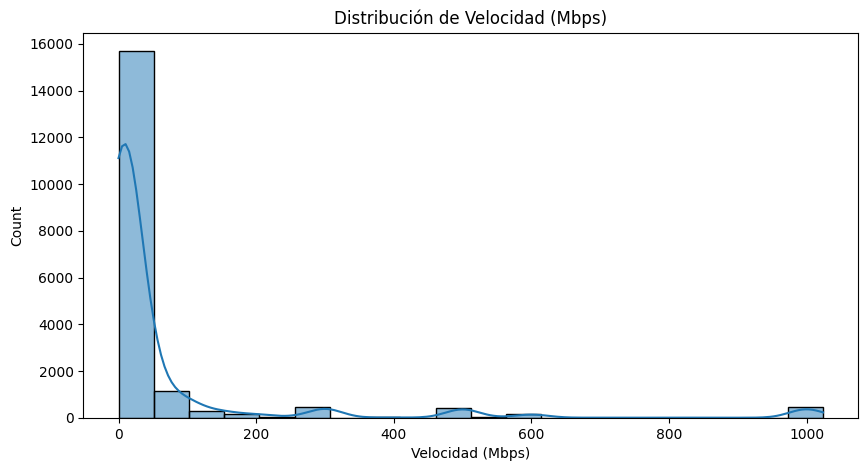

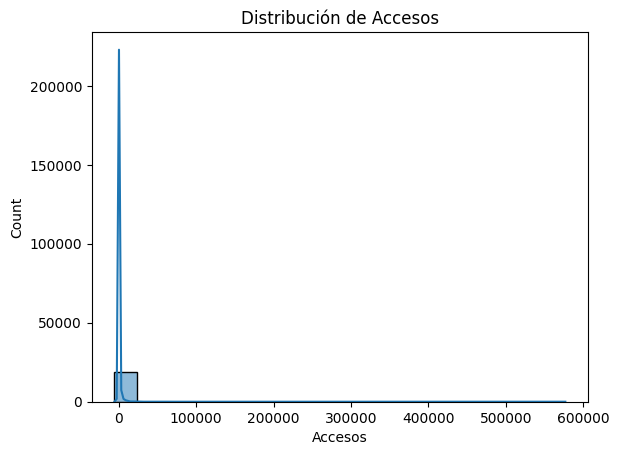

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas de velocidad y accesos
plt.figure(figsize=(10, 5))
sns.histplot(df_Acc_vel_loc_sinrangos['Velocidad (Mbps)'], kde=True, bins=20)
plt.title('Distribución de Velocidad (Mbps)')
plt.show()

sns.histplot(df_Acc_vel_loc_sinrangos['Accesos'], kde=True, bins=20)
plt.title('Distribución de Accesos')
plt.show()


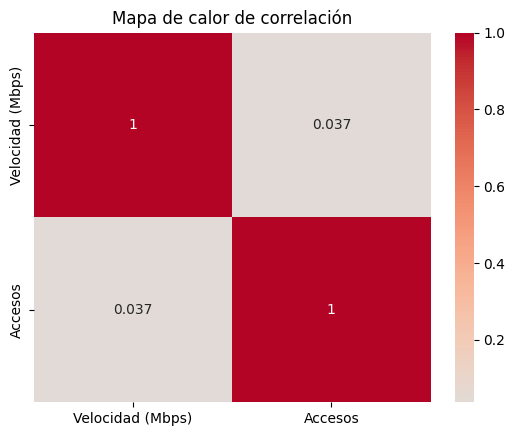

In [41]:
# Correlación entre variables continuas
corr = df_Acc_vel_loc_sinrangos[['Velocidad (Mbps)', 'Accesos']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de calor de correlación')
plt.show()


In [42]:
from scipy import stats

# Calculando Z-scores
z_scores = stats.zscore(df_Acc_vel_loc_sinrangos[['Velocidad (Mbps)', 'Accesos']])
print("Valores atípicos con Z-score (valor absoluto > 3):")
print(df_Acc_vel_loc_sinrangos[(abs(z_scores) > 3)].head())


Valores atípicos con Z-score (valor absoluto > 3):
  país Provincia Partido Localidad link Indec  Velocidad (Mbps)  Accesos  \
0  NaN       NaN     NaN       NaN        NaN               NaN      NaN   
1  NaN       NaN     NaN       NaN        NaN               NaN      NaN   
2  NaN       NaN     NaN       NaN        NaN               NaN      NaN   
3  NaN       NaN     NaN       NaN        NaN               NaN      NaN   
4  NaN       NaN     NaN       NaN        NaN               NaN      NaN   

   Provincia_encoded  Partido_encoded  Localidad_encoded  
0                NaN              NaN                NaN  
1                NaN              NaN                NaN  
2                NaN              NaN                NaN  
3                NaN              NaN                NaN  
4                NaN              NaN                NaN  


In [44]:
# Conteo de categorías
print(df_Acc_vel_loc_sinrangos['Provincia'].value_counts())


Provincia
Buenos Aires           7172
Cordoba                2211
Santa Fe               1892
Entre Rios              747
Mendoza                 706
Salta                   612
Rio Negro               510
Santiago Del Estero     500
La Pampa                474
Misiones                403
Chaco                   398
Tucuman                 377
Neuquen                 342
Corrientes              325
San Juan                311
Chubut                  304
Formosa                 302
Jujuy                   300
San Luis                247
La Rioja                239
Catamarca               217
Santa Cruz              154
Tierra Del Fuego         66
Caba                     55
Name: count, dtype: int64


In [45]:
print(df_Acc_vel_loc_sinrangos['Partido'].value_counts())

Partido
General San Martín     460
Capital                373
La Matanza             340
San Justo              306
Colón                  286
                      ... 
Lihuel Calel             2
San Luis Del Palmar      1
Berón De Astrada         1
Valle Grande             1
Ancasti                  1
Name: count, Length: 432, dtype: int64


In [46]:
print(df_Acc_vel_loc_sinrangos['Localidad'].value_counts())

Localidad
Otros                              132
Ciudad Autónoma De Buenos Aires     53
San Pedro                           52
Canning                             46
San Justo                           44
                                  ... 
Pampa Grande                         1
Arroyo Venado                        1
San Mayol                            1
Colonia San Miguel Arcángel          1
Esteban Agustín Gascón               1
Name: count, Length: 2776, dtype: int64


Columna Accesos tiene valores negativos.


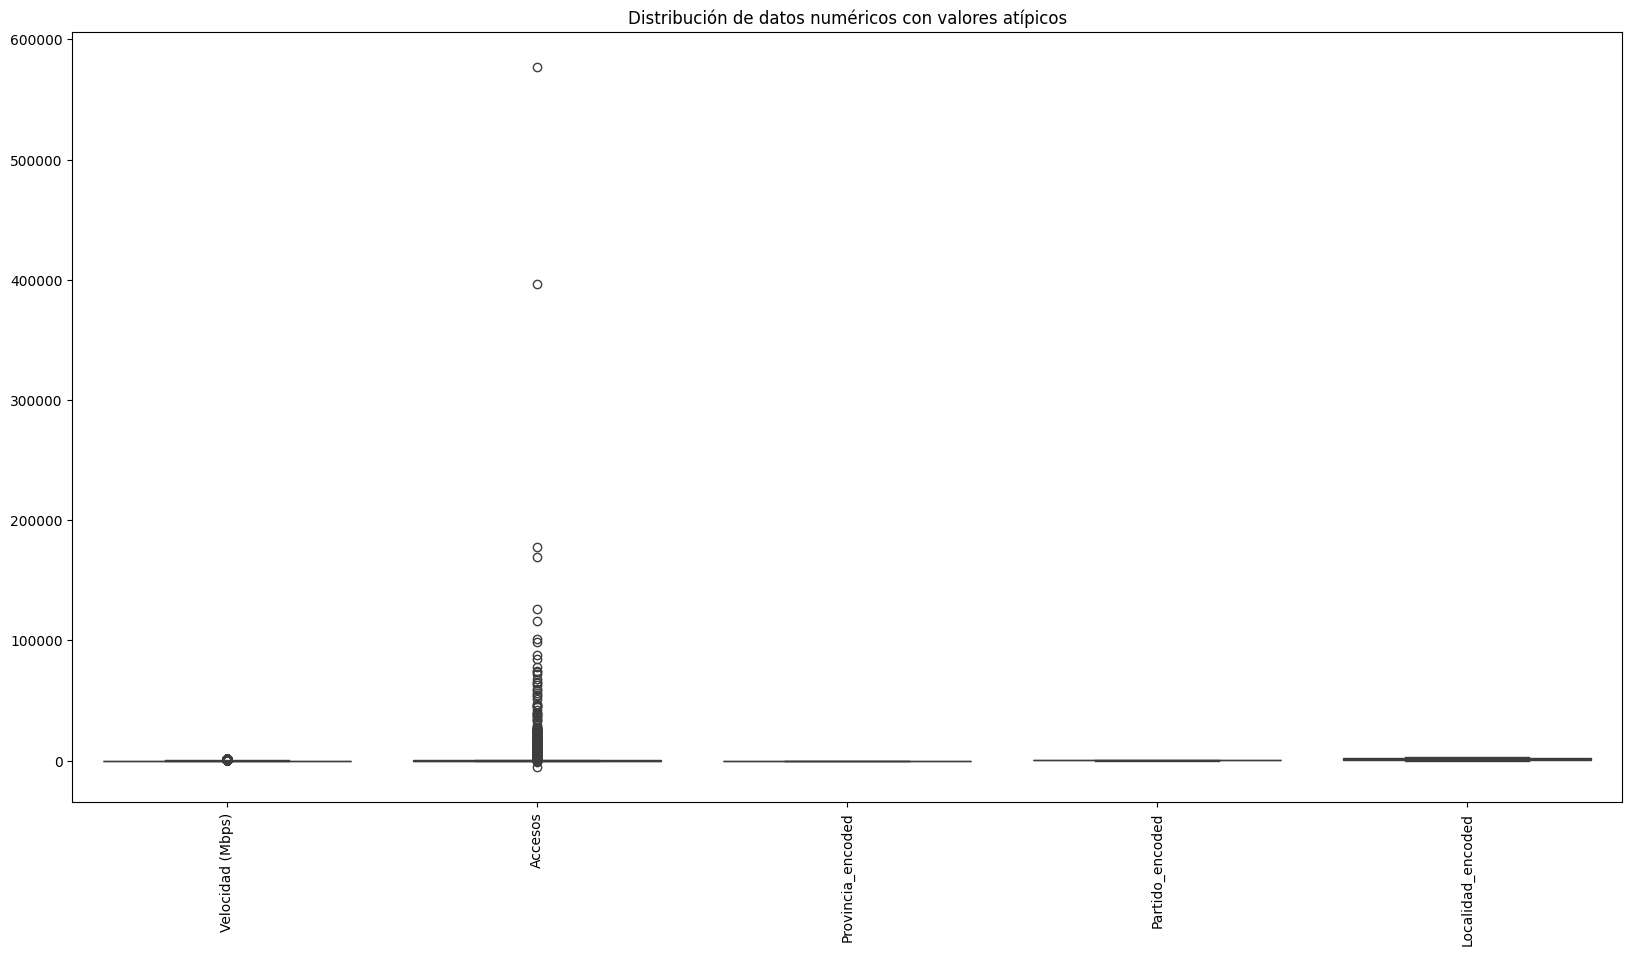

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Revisar columnas con valores negativos
for columna in df_Acc_vel_loc_sinrangos.columns:
    if df_Acc_vel_loc_sinrangos[columna].dtype != 'object' and (df_Acc_vel_loc_sinrangos[columna] < 0).any():
        print(f"Columna {columna} tiene valores negativos.")

# Visualizar valores atípicos en las principales columnas
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_Acc_vel_loc_sinrangos.select_dtypes(include='number'))
plt.xticks(rotation=90)
plt.title("Distribución de datos numéricos con valores atípicos")
plt.show()

In [51]:
# Información adicional de valores nulos
print("\nConteo de valores nulos por columna:")
print(df_Acc_vel_loc_sinrangos.isnull().sum())


Conteo de valores nulos por columna:
país                 0
Provincia            0
Partido              0
Localidad            0
link Indec           0
Velocidad (Mbps)     0
Accesos              7
Provincia_encoded    0
Partido_encoded      0
Localidad_encoded    0
dtype: int64


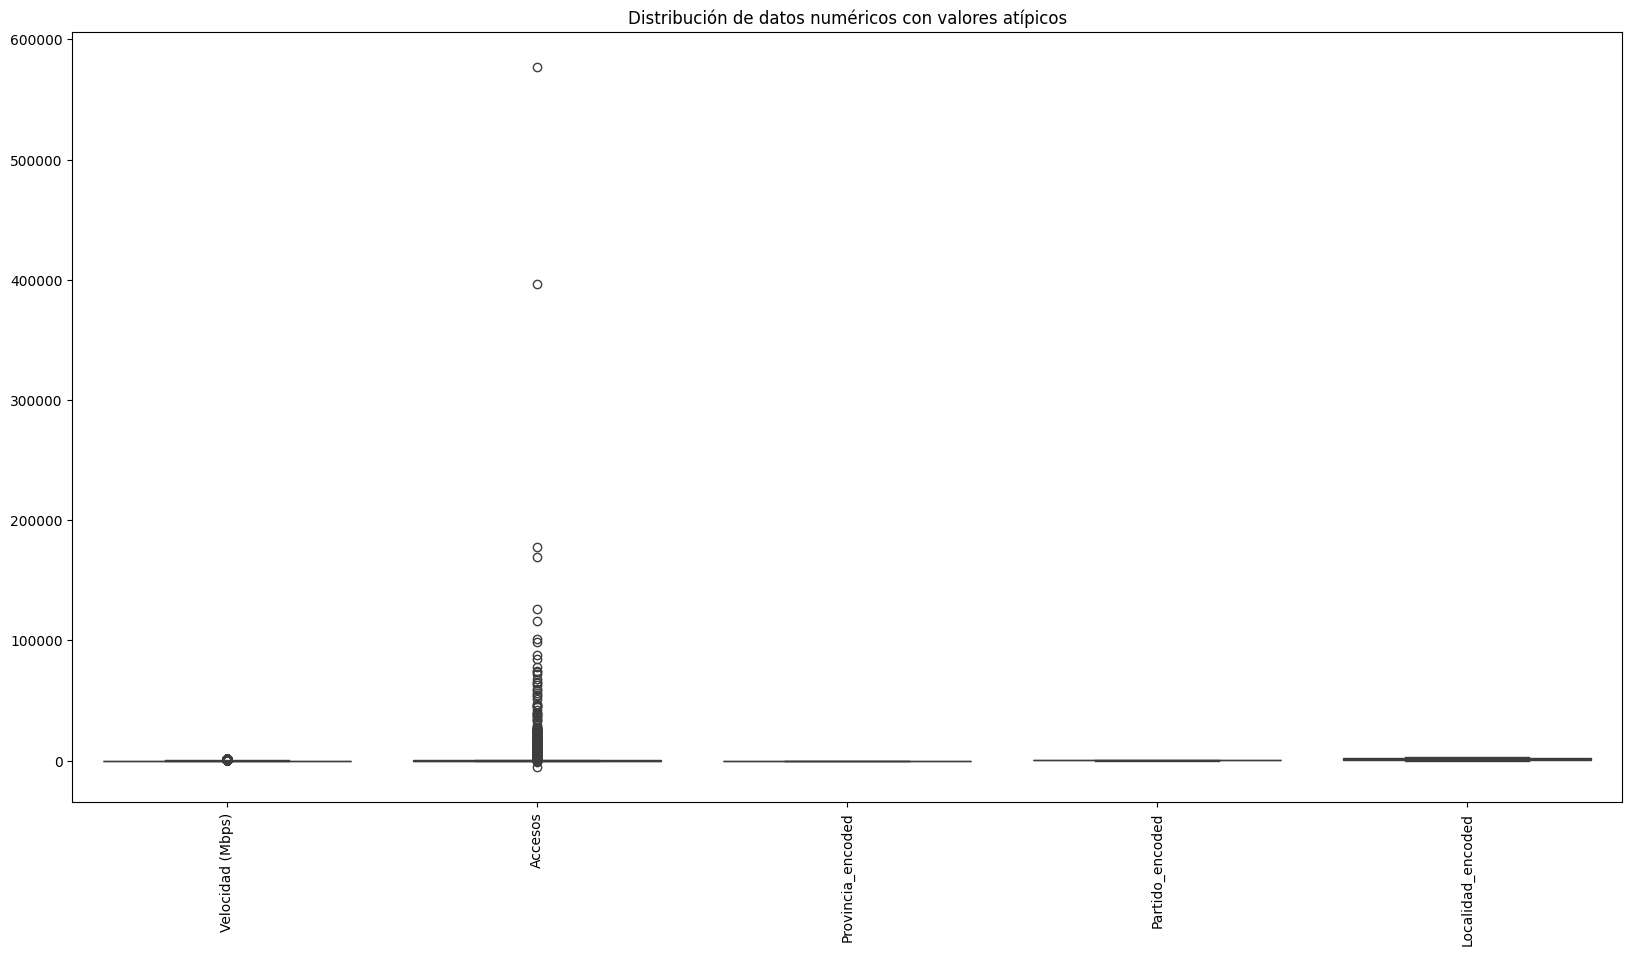

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Visualizar valores atípicos con un gráfico de caja y bigote
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_Acc_vel_loc_sinrangos.select_dtypes(include='number'))
plt.xticks(rotation=90)
plt.title("Distribución de datos numéricos con valores atípicos")
plt.show()

In [56]:
# Identificar columnas con valores negativos y contar cuántos hay
columnas_negativas = {}
for columna in df_Acc_vel_loc_sinrangos.columns:
    if df_Acc_vel_loc_sinrangos[columna].dtype != 'object' and (df_Acc_vel_loc_sinrangos[columna] < 0).any():
        columnas_negativas[columna] = (df_Acc_vel_loc_sinrangos[columna] < 0).sum()

print("Columnas con valores negativos y sus conteos:")
print(columnas_negativas)

# Visualizar las distribuciones de las columnas con valores negativos
import matplotlib.pyplot as plt

for columna, conteo in columnas_negativas.items():
    plt.figure(figsize=(10, 5))
    plt.hist(df_Acc_vel_loc_sinrangos[columna], bins=50, color='red', alpha=0.7)
    plt.title(f"Distribución de {columna} (con valores negativos)")
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.show()

Columnas con valores negativos y sus conteos:
{}


In [55]:
import numpy as np

# Reemplazar valores negativos por NaN
for columna in columnas_negativas.keys():
    df_Acc_vel_loc_sinrangos[columna] = df_Acc_vel_loc_sinrangos[columna].apply(lambda x: np.nan if x < 0 else x)

# Confirmar que se han reemplazado los valores negativos
print("\nRevisión tras reemplazar valores negativos:")
for columna in columnas_negativas.keys():
    print(f"{columna}: {(df_Acc_vel_loc_sinrangos[columna] < 0).sum()} valores negativos restantes")



Revisión tras reemplazar valores negativos:
Accesos: 0 valores negativos restantes


In [57]:
# Guardar las modificaciones en el mismo archivo CSV
df_Acc_vel_loc_sinrangos.to_csv('C:/Users/maron.LAPTOP-UEJMOSD4/Desktop/PI_2/DATA_LIMPIO/Acc_vel_loc_sinrangos.csv', index=False)

In [48]:
import pandas as pd

# Reemplaza 'nombre_archivo.csv' con el nombre de tu archivo CSV
archivo_csv = 'C:/Users/maron.LAPTOP-UEJMOSD4/Desktop/PI_2/DATA_LIMPIO/Accesos por rangos.csv'

# Carga el archivo CSV en un DataFrame
df_Accesos_por_rangos = pd.read_csv(archivo_csv)

# Muestra las primeras 5 filas del DataFrame
print(f"Mostrando las primeras 5 filas de {archivo_csv}:")
print(df_Accesos_por_rangos.head())

Mostrando las primeras 5 filas de C:/Users/maron.LAPTOP-UEJMOSD4/Desktop/PI_2/DATA_LIMPIO/Accesos por rangos.csv:
    Año  Trimestre        Provincia  HASTA 512 kbps  + 512 Kbps - 1 Mbps  \
0  2024          2     Buenos Aires         25287.0              23034.0   
1  2024          2  Capital Federal           518.0               4122.0   
2  2024          2        Catamarca            72.0                164.0   
3  2024          2            Chaco           236.0                349.0   
4  2024          2           Chubut           125.0               1139.0   

   + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  + 10 Mbps - 20 Mbps  \
0           222627.0            221660.0             244528.0   
1            24539.0             40296.0              33158.0   
2             2660.0              3093.0               3799.0   
3            14594.0              8336.0               6208.0   
4            43699.0             31971.0              22696.0   

   + 20 Mbps - 30 Mbps  + 30 Mbps     

In [49]:
# Mostrar información básica del DataFrame
print(df_Accesos_por_rangos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  1000 non-null   int64  
 1   Trimestre            1000 non-null   int64  
 2   Provincia            1000 non-null   object 
 3   HASTA 512 kbps       1000 non-null   float64
 4   + 512 Kbps - 1 Mbps  1000 non-null   float64
 5   + 1 Mbps - 6 Mbps    1000 non-null   float64
 6   + 6 Mbps - 10 Mbps   1000 non-null   float64
 7   + 10 Mbps - 20 Mbps  1000 non-null   float64
 8   + 20 Mbps - 30 Mbps  1000 non-null   float64
 9   + 30 Mbps            1000 non-null   float64
 10  OTROS                994 non-null    float64
 11  Total                1000 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 93.9+ KB
None


In [ ]:
# Convertir la columna 'Año' a tipo string
df_Accesos_por_rangos['Año'] = df_Accesos_por_rangos['Año'].astype(str)


In [ ]:
import pandas as pd

# Reemplaza 'nombre_archivo.csv' con el nombre de tu archivo CSV
archivo_csv = 'C:/Users/maron.LAPTOP-UEJMOSD4/Desktop/PI_2/DATA_LIMPIO/nombre_archivo.csv'

# Carga el archivo CSV en un DataFrame
df = pd.read_csv(archivo_csv)

# Muestra las primeras 5 filas del DataFrame
print(f"Mostrando las primeras 5 filas de {archivo_csv}:")
print(df.head())


In [ ]:
import pandas as pd

# Cargar la hoja de cálculo en un DataFrame
arc_excel = 'C:/Users/maron.LAPTOP-UEJMOSD4/Desktop/PI_2/Internet.xlsx'
Acceso_loc_df = pd.read_excel(arc_excel, sheet_name='Accesos_tecnologia_localidad')  # Puedes omitir `sheet_name` para cargar la primera hoja

# Mostrar las primeras filas del DataFrame
print(Acceso_loc_df.head())


      Provincia     Partido   Localidad    Tecnologia Link Indec  Accesos
0  BUENOS AIRES  25 de Mayo  25 de Mayo          ADSL    6854100    755.0
1  BUENOS AIRES  25 de Mayo  25 de Mayo    CABLEMODEM    6854100   4600.0
2  BUENOS AIRES  25 de Mayo  25 de Mayo  FIBRA OPTICA    6854100      2.0
3  BUENOS AIRES  25 de Mayo  25 de Mayo     SATELITAL    6854100    742.0
4  BUENOS AIRES  25 de Mayo  25 de Mayo      WIRELESS    6854100    727.0


In [5]:
print("Valores únicos en 'Provincia':")
print(Acceso_loc_df['Provincia'].unique())







Valores únicos en 'Provincia':
['BUENOS AIRES' 'CABA' 'CATAMARCA' 'CHACO' 'CHUBUT' 'CORDOBA' 'CORRIENTES'
 'ENTRE RIOS' 'FORMOSA' 'JUJUY' 'LA PAMPA' 'LA RIOJA' 'MENDOZA' 'MISIONES'
 'NEUQUEN' 'RIO NEGRO' 'SALTA' 'SAN JUAN' 'SAN LUIS' 'SANTA CRUZ'
 'SANTA FE' 'SANTIAGO DEL ESTERO' 'TIERRA DEL FUEGO' 'TUCUMAN']


In [9]:
print("\nValores únicos en 'Partido':")
print(Acceso_loc_df['Partido'].unique())



Valores únicos en 'Partido':
['25 DE MAYO' '9 DE JULIO' 'ADOLFO ALSINA' 'ADOLFO GONZALES CHAVES'
 'ALBERTI' 'ALMIRANTE BROWN' 'AMBA' 'ARRECIFES' 'AVELLANEDA' 'AYACUCHO'
 'AZUL' 'BAHÍA BLANCA' 'BALCARCE' 'BARADERO' 'BENITO JUÁREZ' 'BERAZATEGUI'
 'BERISSO' 'BOLÍVAR' 'BRAGADO' 'BRANDSEN' 'CAMPANA' 'CAÑUELAS'
 'CAPITÁN SARMIENTO' 'CARLOS CASARES' 'CARLOS TEJEDOR' 'CARMEN DE ARECO'
 'CASTELLI' 'CHACABUCO' 'CHASCOMÚS' 'CHIVILCOY' 'COLÓN'
 'CORONEL DE MARINA L. ROSALES' 'CORONEL DORREGO' 'CORONEL PRINGLES'
 'CORONEL SUÁREZ' 'DAIREAUX' 'DOLORES' 'ENSENADA' 'ESCOBAR'
 'ESTEBAN ECHEVERRÍA' 'EXALTACIÓN DE LA CRUZ' 'EZEIZA' 'FLORENCIO VARELA'
 'FLORENTINO AMEGHINO' 'GENERAL ALVARADO' 'GENERAL ARENALES'
 'GENERAL BELGRANO' 'GENERAL GUIDO' 'GENERAL JUAN MADARIAGA'
 'GENERAL LA MADRID' 'GENERAL LAS HERAS' 'GENERAL LAVALLE' 'GENERAL PAZ'
 'GENERAL PINTO' 'GENERAL PUEYRREDÓN' 'GENERAL RODRÍGUEZ'
 'GENERAL SAN MARTÍN' 'GENERAL VIAMONTE' 'GENERAL VILLEGAS' 'GUAMINÍ'
 'HIPÓLITO YRIGOYEN' 'HURLINGHAM' 'IT

In [8]:
# Normalizar los nombres: eliminar espacios y convertir a mayúsculas
Acceso_loc_df['Partido'] = Acceso_loc_df['Partido'].str.strip().str.upper()


In [10]:
# Listar los valores únicos de nuevo después de la normalización
print("Valores únicos normalizados en 'Partido':")
print(Acceso_loc_df['Partido'].value_counts())


Valores únicos normalizados en 'Partido':
Partido
SAN JUSTO                   136
CAPITAL                     124
GENERAL SAN MARTÍN          118
COLÓN                       100
GENERAL ROCA                 94
                           ... 
ANTOFAGASTA DE LA SIERRA      1
SAN LUIS DEL PALMAR           1
ANCASTI                       1
BERÓN DE ASTRADA              1
ZONDA                         1
Name: count, Length: 432, dtype: int64


In [11]:
# Reemplazar variaciones específicas
Acceso_loc_df['Partido'].replace({
    'GRAL. PAZ': 'GENERAL PAZ',
    'L. DE ZAMORA': 'LOMAS DE ZAMORA',
    # Agrega más correcciones específicas aquí
}, inplace=True)


C:\Users\maron.LAPTOP-UEJMOSD4\AppData\Local\Temp\ipykernel_231500\1090364338.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Acceso_loc_df['Partido'].replace({


In [12]:
from thefuzz import process

# Elegir un partido de referencia y encontrar coincidencias similares
partido_referencia = 'GENERAL SAN MARTÍN'
coincidencias = process.extract(partido_referencia, Acceso_loc_df['Partido'].unique(), limit=10, scorer=fuzz.ratio)

# Mostrar partidos similares al de referencia
print(coincidencias)


NameError: name 'fuzz' is not defined

In [13]:
Acceso_loc_df['Partido'].replace({
    'GRAL. SAN MARTÍN': 'GENERAL SAN MARTÍN',
    # Otras correcciones según los resultados de `fuzzywuzzy`
}, inplace=True)


In [14]:
print("\nValores únicos finales en 'Partido':")
print(Acceso_loc_df['Partido'].unique())



Valores únicos finales en 'Partido':
['25 DE MAYO' '9 DE JULIO' 'ADOLFO ALSINA' 'ADOLFO GONZALES CHAVES'
 'ALBERTI' 'ALMIRANTE BROWN' 'AMBA' 'ARRECIFES' 'AVELLANEDA' 'AYACUCHO'
 'AZUL' 'BAHÍA BLANCA' 'BALCARCE' 'BARADERO' 'BENITO JUÁREZ' 'BERAZATEGUI'
 'BERISSO' 'BOLÍVAR' 'BRAGADO' 'BRANDSEN' 'CAMPANA' 'CAÑUELAS'
 'CAPITÁN SARMIENTO' 'CARLOS CASARES' 'CARLOS TEJEDOR' 'CARMEN DE ARECO'
 'CASTELLI' 'CHACABUCO' 'CHASCOMÚS' 'CHIVILCOY' 'COLÓN'
 'CORONEL DE MARINA L. ROSALES' 'CORONEL DORREGO' 'CORONEL PRINGLES'
 'CORONEL SUÁREZ' 'DAIREAUX' 'DOLORES' 'ENSENADA' 'ESCOBAR'
 'ESTEBAN ECHEVERRÍA' 'EXALTACIÓN DE LA CRUZ' 'EZEIZA' 'FLORENCIO VARELA'
 'FLORENTINO AMEGHINO' 'GENERAL ALVARADO' 'GENERAL ARENALES'
 'GENERAL BELGRANO' 'GENERAL GUIDO' 'GENERAL JUAN MADARIAGA'
 'GENERAL LA MADRID' 'GENERAL LAS HERAS' 'GENERAL LAVALLE' 'GENERAL PAZ'
 'GENERAL PINTO' 'GENERAL PUEYRREDÓN' 'GENERAL RODRÍGUEZ'
 'GENERAL SAN MARTÍN' 'GENERAL VIAMONTE' 'GENERAL VILLEGAS' 'GUAMINÍ'
 'HIPÓLITO YRIGOYEN' 'HURLING

In [15]:

print("\nValores únicos en 'Localidad':")
print(Acceso_loc_df['Localidad'].unique())


Valores únicos en 'Localidad':
['25 de Mayo' 'Del Valle' 'Ernestina' ... 'Villa  de Trancas'
 'Villa Carmela' 'Yerba Buena - Marcos Paz']


In [16]:
# Normalizar los nombres: eliminar espacios y convertir a mayúsculas
Acceso_loc_df['Localidad'] = Acceso_loc_df['Localidad'].str.strip().str.upper()


In [19]:
from thefuzz import process, fuzz


In [20]:
from thefuzz import process, fuzz

# Elegir una localidad de referencia y encontrar coincidencias similares
localidad_referencia = 'YERBA BUENA'
coincidencias = process.extract(localidad_referencia, Acceso_loc_df['Localidad'].unique(), limit=10, scorer=fuzz.ratio)

# Mostrar localidades similares a la de referencia
print(coincidencias)


[('PIEDRABUENA', 73), ('YERBA BUENA - MARCOS PAZ', 63), ('GOBERNADOR BENEGAS', 55), ('VILLA BERNA', 55), ('MARÍA JUANA', 55), ("GENERAL O'BRIEN", 54), ('GENERAL CABRERA', 54), ('PIEDRAS BLANCAS', 54), ('LA BANDA', 53), ('LA BATEA', 53)]


In [18]:
print("\nValores únicos finales en 'Localidad':")
print(Acceso_loc_df['Localidad'].unique())



Valores únicos finales en 'Localidad':
['25 DE MAYO' 'DEL VALLE' 'ERNESTINA' ... 'VILLA  DE TRANCAS'
 'VILLA CARMELA' 'YERBA BUENA - MARCOS PAZ']


In [21]:
# Reemplazar variaciones específicas de localidades
Acceso_loc_df['Localidad'].replace({
    'YERBA BUENA - MARCOS PAZ': 'YERBA BUENA',
    # Agrega más correcciones aquí si encuentras otras variantes
}, inplace=True)


C:\Users\maron.LAPTOP-UEJMOSD4\AppData\Local\Temp\ipykernel_231500\4175830331.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Acceso_loc_df['Localidad'].replace({
